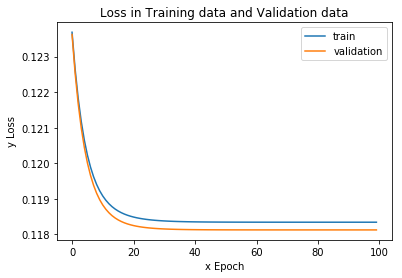

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np

# get train data and validation data
def get_data():
    data = load_svmlight_file("australian_scale.txt")
    return data[0].toarray(), data[1]
X, y = get_data()
X_train, X_validation, y_train, y_valid`ation = train_test_split(X, y, test_size=0.33, random_state=42)

Epochs=100
lr=0.1
C=2**-3

#train and validation loss array
train_loss_arr=[]
validation_loss_arr=[]

# init w
w = np.zeros((15, 1))

# modify X for bias
train_column = np.ones((len(X_train), 1))
X_train = np.column_stack((X_train, train_column))
validation_column = np.ones((len(X_validation), 1))
X_validation = np.column_stack((X_validation, validation_column))

for count in range(Epochs):    
    # calculate the gradient
    temp = 1 - (y_train.reshape(-1, 1) * np.dot(X_train, w))
    temp[temp<=0] = 0
    grad = w - C * (np.dot(np.transpose(X_train), temp * y_train.reshape(-1, 1)))/len(X_train)
    
    # update
    w = w - lr * grad

    # record loss in traing dataset
    temp = 1 - (y_train.reshape(-1, 1) * np.dot(X_train, w))
    temp[temp<=0] = 0
    training_loss = (1.0/2) * (np.dot(np.transpose(w), w)) + C * np.sum(temp)/len(X_train)
    training_loss = training_loss.reshape(-1)

    # record loss in validation dataset
    temp = 1 - (y_validation.reshape(-1, 1) * np.dot(X_validation, w))
    temp[temp<=0] = 0
    validation_loss = (1.0/2) * (np.dot(np.transpose(w), w)) + C * np.sum(temp)/len(X_validation)
    validation_loss = validation_loss.reshape(-1)

    train_loss_arr.extend(training_loss)
    validation_loss_arr.extend(validation_loss)

# plot
plt.xlabel('x Epoch')
plt.ylabel('y Loss')
plt.title("Loss in Training data and Validation data")
plt.plot(list(range(count+1)) , train_loss_arr,label = "train")
plt.plot(list(range(count+1)) , validation_loss_arr,label = "validation")
plt.legend()
plt.show()